<a href="https://colab.research.google.com/github/sterlinggutterman/labs/blob/main/SG_04_hedonic_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [118]:
! git clone https://github.com/sterlinggutterman/labs

fatal: destination path 'labs' already exists and is not an empty directory.


In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Data - Cars

In [120]:
# data set
df = pd.read_csv('/content/labs/04_hedonic_pricing/cars_hw.csv')
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB


In [123]:
# cleaning
df['Make_Year'] = df['Make_Year'].astype(str)

In [124]:
# price
print(df['Price'].value_counts(), '\n')
print(df['Price'].describe(), '\n')

Price
790000    8
914000    7
589000    7
812000    6
651000    6
         ..
882000    1
654000    1
634000    1
806000    1
736000    1
Name: count, Length: 585, dtype: int64 

count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64 



<Axes: ylabel='Frequency'>

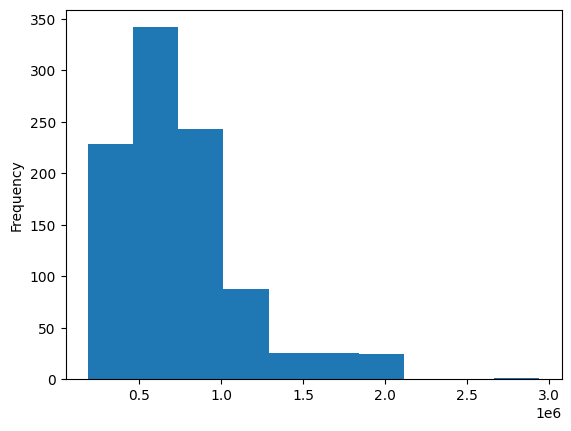

In [125]:
df['Price'].plot.hist()

<Axes: ylabel='Density'>

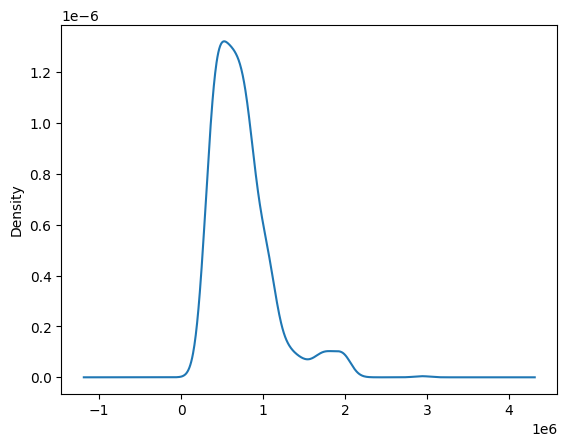

In [126]:
df['Price'].plot.density()

<Axes: >

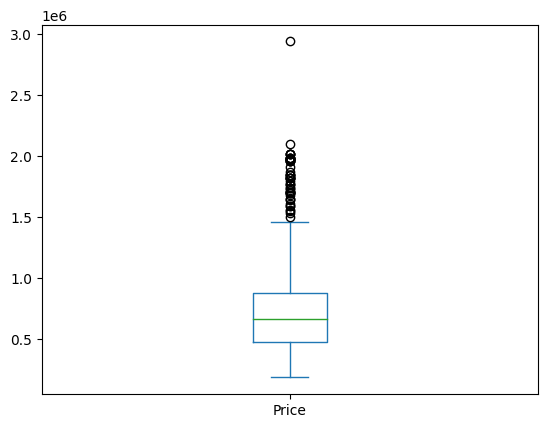

In [127]:
df['Price'].plot.box()

<Axes: xlabel='Price', ylabel='Density'>

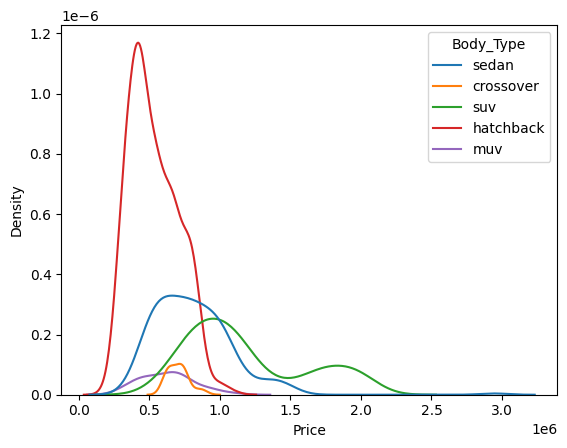

In [128]:
sns.kdeplot(data=df, x='Price', hue='Body_Type')

Observations
- hatchback prices are very concentrated
- sedans have the most variation in price

<Axes: xlabel='Price', ylabel='Density'>

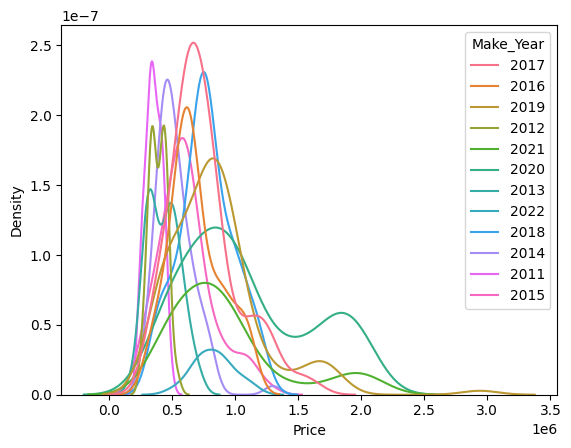

In [129]:
sns.kdeplot(data=df, x='Price', hue='Make_Year')

Observations
- Prices for 2018 and 2019 are the most concentrated
- 2020 and 2021 had the most expensive cars

<Axes: >

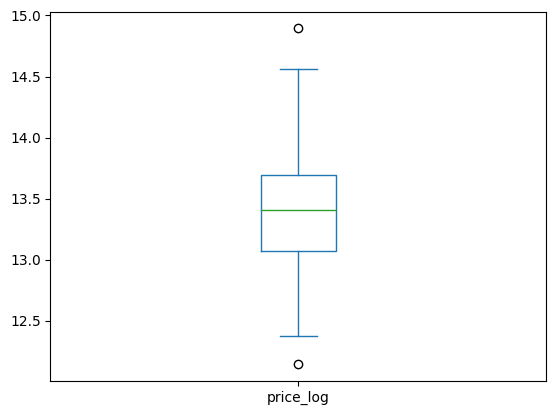

In [130]:
# using log to transform
df['price_log'] = np.log(df['Price'])
df['price_log'].plot.box()

box plot is much cleaner - almost all outliers have been removed

<Axes: xlabel='Price', ylabel='Density'>

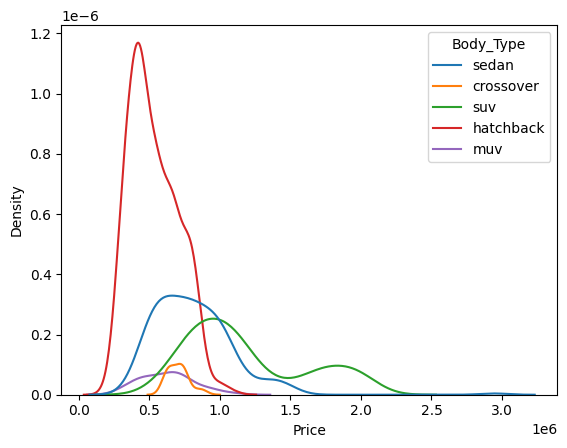

In [131]:
sns.kdeplot(data=df, x='Price', hue='Body_Type')

density plot stayed the same

In [132]:
# car type
print(df['Body_Type'].describe())
print(df['Body_Type'].value_counts())

count           976
unique            5
top       hatchback
freq            484
Name: Body_Type, dtype: object
Body_Type
hatchback    484
sedan        227
suv          206
muv           38
crossover     21
Name: count, dtype: int64


<Axes: >

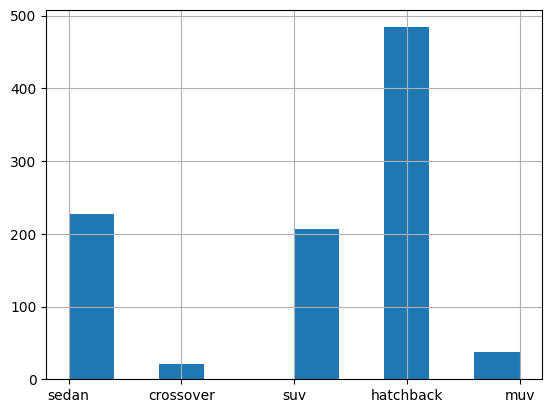

In [133]:
df['Body_Type'].hist()

In [134]:
# car model
print(df['Make'].describe())
print(df['Make'].value_counts())

count         976
unique         16
top       Hyundai
freq          305
Name: Make, dtype: object
Make
Hyundai          305
Maruti Suzuki    293
Honda             73
Renault           68
Ford              52
Toyota            50
MG Motors         35
Volkswagen        29
Tata              23
Mahindra          18
Kia                8
Chevrolet          6
Skoda              5
Nissan             4
Jeep               4
Datsun             3
Name: count, dtype: int64


<Axes: >

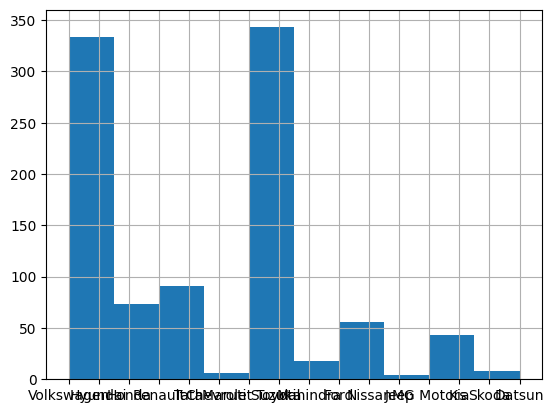

In [135]:
df['Make'].hist()

In [136]:
# car year
print(df['Make_Year'].describe())
print(df['Make_Year'].value_counts())

count      976
unique      12
top       2017
freq       137
Name: Make_Year, dtype: object
Make_Year
2017    137
2020    135
2019    124
2018    112
2016     92
2015     85
2014     73
2021     69
2013     53
2011     44
2012     38
2022     14
Name: count, dtype: int64


<Axes: >

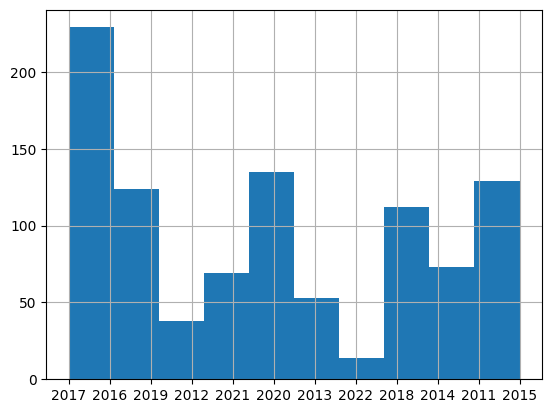

In [137]:
df['Make_Year'].hist()

<Axes: xlabel='Make_Year', ylabel='Mileage_Run'>

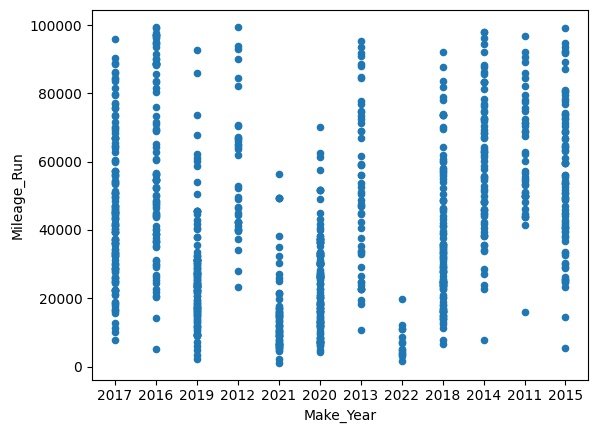

In [138]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Make_Year', y='Mileage_Run')

2. Transform Variables

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         976 non-null    int64  
 1   Make               976 non-null    object 
 2   Make_Year          976 non-null    object 
 3   Color              976 non-null    object 
 4   Body_Type          976 non-null    object 
 5   Mileage_Run        976 non-null    int64  
 6   No_of_Owners       976 non-null    object 
 7   Seating_Capacity   976 non-null    int64  
 8   Fuel_Type          976 non-null    object 
 9   Transmission       976 non-null    object 
 10  Transmission_Type  976 non-null    object 
 11  Price              976 non-null    int64  
 12  price_log          976 non-null    float64
dtypes: float64(1), int64(4), object(8)
memory usage: 99.2+ KB


In [140]:
make_d = pd.get_dummies(df['Make'], dtype = 'int')
bt_d = pd.get_dummies(df['Body_Type'], dtype = 'int')
my_d = pd.get_dummies(df['Make_Year'], dtype = 'int')
color_d = pd.get_dummies(df['Color'], dtype = 'int')

3. Splitting the data

In [141]:
from sklearn.model_selection import train_test_split
x = pd.concat([make_d, bt_d, my_d, color_d,df['Mileage_Run']], axis=1)
y = df['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

4. Simple Regressions

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [143]:
# regression of make and price on train set
reg_model = LinearRegression(fit_intercept=False).fit(x_train[make_d.columns], y_train)

# measure of model
y_hat = reg_model.predict(x_test[make_d.columns])
print('R-squared: ', reg_model.score(x_test[make_d.columns],y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

# display coefficients
result = pd.DataFrame({'variable':reg_model.feature_names_in_, 'coefficient': reg_model.coef_})
result

R-squared:  0.568455539322757
RMSE:  243423.55834632888


,variable,coefficient
0,Chevrolet,4.535000e+05
1,Datsun,2.950000e+05
2,Ford,7.355854e+05
3,Honda,8.146271e+05
4,Hyundai,6.947542e+05
5,Jeep,1.290000e+06
6,Kia,1.614750e+06
7,MG Motors,1.876800e+06
8,Mahindra,1.094063e+06
9,Maruti Suzuki,5.781772e+05


In [144]:
# regression of make and price on test set
reg_model = LinearRegression(fit_intercept=False).fit(x_test[make_d.columns], y_test)

# measure of model
y_hat = reg_model.predict(x_train[make_d.columns])
print('R-squared: ', reg_model.score(x_train[make_d.columns],y_train))
rmse = np.sqrt( np.mean( (y_train - y_hat)**2 ))
print('RMSE: ', rmse)

# display coefficients
result = pd.DataFrame({'variable':reg_model.feature_names_in_, 'coefficient': reg_model.coef_})
result

R-squared:  0.1756485978428075
RMSE:  332526.131151828


,variable,coefficient
0,Chevrolet,0.000000e+00
1,Datsun,2.790000e+05
2,Ford,6.674545e+05
3,Honda,7.330000e+05
4,Hyundai,6.813231e+05
5,Jeep,1.569333e+06
6,Kia,0.000000e+00
7,MG Motors,1.851100e+06
8,Mahindra,1.149000e+06
9,Maruti Suzuki,6.336786e+05


In [145]:
# regression of body type and price on train set
reg_model = LinearRegression(fit_intercept=False).fit(x_train[bt_d.columns], y_train)

# measure of model
y_hat = reg_model.predict(x_test[bt_d.columns])
print('R-squared: ', reg_model.score(x_test[bt_d.columns],y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

# display coefficients
result = pd.DataFrame({'variable':reg_model.feature_names_in_, 'coefficient': reg_model.coef_})
result

R-squared:  0.5213140869559594
RMSE:  256374.6951572424


,variable,coefficient
0,crossover,6.946667e+05
1,hatchback,5.317953e+05
2,muv,6.055484e+05
3,sedan,8.215789e+05
4,suv,1.145793e+06


In [146]:
# regression of year and price on train set
reg_model = LinearRegression(fit_intercept=False).fit(x_train[my_d.columns], y_train)

# measure of model
y_hat = reg_model.predict(x_test[my_d.columns])
print('R-squared: ', reg_model.score(x_test[my_d.columns],y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

# display coefficients
result = pd.DataFrame({'variable':my_d.columns, 'coefficient': reg_model.coef_})
result

R-squared:  0.31491934940809463
RMSE:  306704.8786273371


,variable,coefficient
0,2011,3.512727e+05
1,2012,3.857879e+05
2,2013,4.345000e+05
3,2014,5.246852e+05
4,2015,6.214769e+05
5,2016,6.932308e+05
6,2017,7.446337e+05
7,2018,7.592791e+05
8,2019,8.513500e+05
9,2020,1.079954e+06


In [147]:
# regression of color and price on train set
reg_model = LinearRegression(fit_intercept=False).fit(x_train[color_d.columns], y_train)

# measure of model
y_hat = reg_model.predict(x_test[color_d.columns])
print('R-squared: ', reg_model.score(x_test[color_d.columns],y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

# display coefficients
result = pd.DataFrame({'variable':reg_model.feature_names_in_, 'coefficient': reg_model.coef_})
result

R-squared:  -0.07482669266138031
RMSE:  384166.1144798964


,variable,coefficient
0,beige,5.841429e+05
1,black,1.098400e+06
2,blue,7.075000e+05
3,bronze,5.228889e+05
4,brown,8.110175e+05
5,golden,7.280000e+05
6,green,3.350000e+05
7,grey,6.450000e+05
8,maroon,1.709000e+06
9,orange,7.636429e+05


5. Transformations and Interactions

In [148]:
# ML regression of make and body type vs. price on train set
MLR_columns = make_d.columns.tolist() + bt_d.columns.tolist()
reg_model = LinearRegression(fit_intercept=False).fit(x_train[MLR_columns], y_train)

# measure of model
y_hat = reg_model.predict(x_test[MLR_columns])
print('R-squared: ', reg_model.score(x_test[MLR_columns],y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

# display coefficients
result = pd.DataFrame({'variable':reg_model.feature_names_in_, 'coefficient': reg_model.coef_})
result

R-squared:  0.7319259662226241
RMSE:  191856.8051031475


,variable,coefficient
0,Chevrolet,-98178.110255
1,Datsun,-170538.756825
2,Ford,-28436.750582
3,Honda,102971.808005
4,Hyundai,100678.575272
5,Jeep,388484.918809
6,Kia,713234.918809
7,MG Motors,975284.918809
8,Mahindra,192547.418809
9,Maruti Suzuki,34300.037638


In [149]:
# ML regression of make and year vs. price on train set
MLR_columns = make_d.columns.tolist() + my_d.columns.tolist()
reg_model = LinearRegression(fit_intercept=False).fit(x_train[MLR_columns], y_train)

# measure of model
y_hat = reg_model.predict(x_test[MLR_columns])
print('R-squared: ', reg_model.score(x_test[MLR_columns],y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

# display coefficients
result = pd.DataFrame({'variable':reg_model.feature_names_in_, 'coefficient': reg_model.coef_})
result

R-squared:  0.7177835592610435
RMSE:  196852.52445588057


,variable,coefficient
0,Chevrolet,-4.327497e+18
1,Datsun,-4.327497e+18
2,Ford,-4.327497e+18
3,Honda,-4.327497e+18
4,Hyundai,-4.327497e+18
5,Jeep,-4.327497e+18
6,Kia,-4.327497e+18
7,MG Motors,-4.327497e+18
8,Mahindra,-4.327497e+18
9,Maruti Suzuki,-4.327497e+18


In [150]:
# ML regression of make, type, and year vs. price on train set
MLR_columns = make_d.columns.tolist() + bt_d.columns.tolist() + my_d.columns.tolist()
reg_model = LinearRegression(fit_intercept=False).fit(x_train[MLR_columns], y_train)

# measure of model
y_hat = reg_model.predict(x_test[MLR_columns])
print('R-squared: ', reg_model.score(x_test[MLR_columns],y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

# display coefficients
result = pd.DataFrame({'variable':reg_model.feature_names_in_, 'coefficient': reg_model.coef_})
result

R-squared:  0.8209038995509007
RMSE:  156816.91227826735


,variable,coefficient
0,Chevrolet,6.151072e+17
1,Datsun,6.151072e+17
2,Ford,6.151072e+17
3,Honda,6.151072e+17
4,Hyundai,6.151072e+17
5,Jeep,6.151072e+17
6,Kia,6.151072e+17
7,MG Motors,6.151072e+17
8,Mahindra,6.151072e+17
9,Maruti Suzuki,6.151072e+17


6. Observations
- The cars data set contains many different variables that would have all been interesting to investigate. I chose to look at make, body type, year, and price. If I were to do this assignment again, I would make another train / set set using mileage_run. All my regressions looked at how different variables are related to price, however, it would have also been interesting to look at how metrics like year and number of owners influenced the amount of miles on a car.
- For the simple regressions, I investigated the relationship between each variable and price individually.
  - Make was fairly correlated to price, with an r^2 of 0.56. Tata had the biggest influence with a coefficient of 8.766000e+05. The train train set was more accurate, as the test r^2 was 0.17 for the same metrics. This finding indicates that the model is probably overfitt.
  - Type had a similar relationship with price, as the r^2 was 0.52. Sedan had the biggest coefficient at 8.215789e+06.
  - For year, there was a 0.31 r^2. 2021 had the highest coefficient with 9.090000e+05. 2020 had a coefficient of 1.079954e+06 which is interesting but not surprising given the pandemic.
  - Color was the only variable to produce a negative r^2. This finding is also not surprising given color is all about personal preference. It would be interesting to see if custom colors are expensive enough to cause an impact.
- For the multiple linear regressions, I investigated how different variables together correlated with price.
  - Make and type produced an r^2 of 0.73. MG motors had the highest coefficient for make at 975284.918809 and suv had the highest coefficient for model at 901515.081191. This finding makes sense because SUVs are generally the biggest types of cars.
  - For make and year, the r^2 was 0.72. However, every make coefficient is negative. It makes sense that all the coefficients would be similar, as car pricing trends are probably experienced by all brands similarlly. There were not signficant differences between the coefficients for different years.   
  - While the r^2 for regressing make, type, and year together on price was the highest yet at 0.82, there was no significant variation between the coefficients for make, model, or year.